In [201]:
from urllib.request import urlretrieve
import pandas as pd
import plotly.express as px
import plotly.io as pio
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import nbformat
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [202]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [203]:
urlretrieve(medical_charges_url, 'medical.csv')
medical_df = pd.read_csv('medical.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


This dataset contains 1338 rows and 7 columns. Each row contains data about one customer each. 
We have to find the value of the charges columns using the data in the other columns.

In [204]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are no null values in any of the columns

In [205]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [206]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

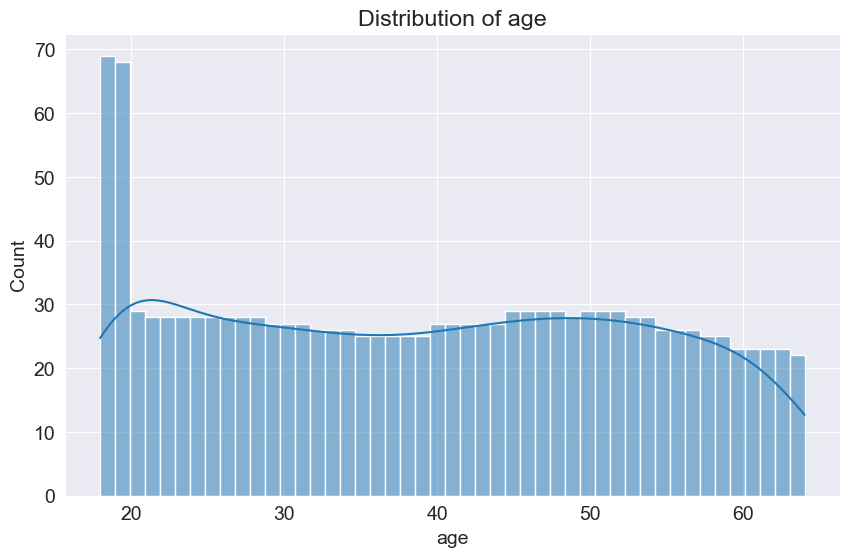

In [207]:
sns.histplot(data=medical_df, 
             x='age', 
             bins=47, 
             kde=True)
plt.title('Distribution of age')
plt.show()

In [208]:
medical_df.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

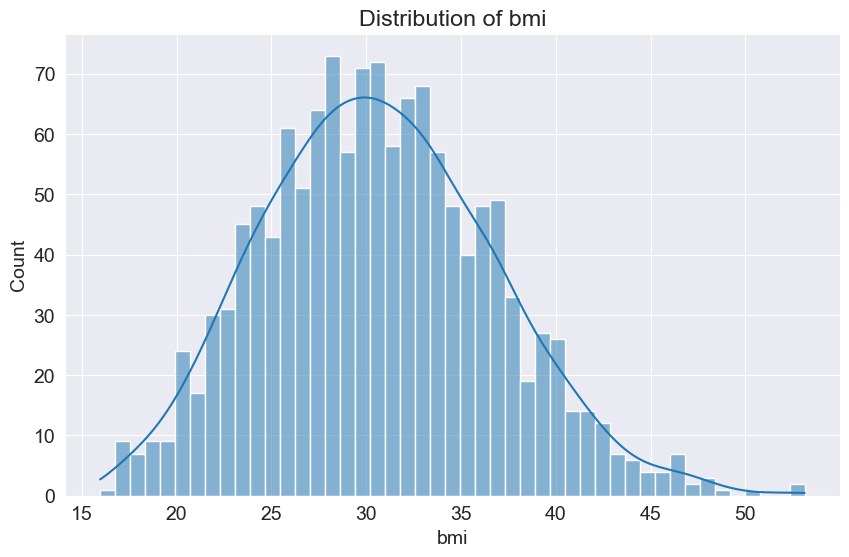

In [209]:
sns.histplot(data=medical_df, 
             x='bmi', 
             bins=47, 
             kde=True)
plt.title('Distribution of bmi')
plt.show()

In [210]:
medical_df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

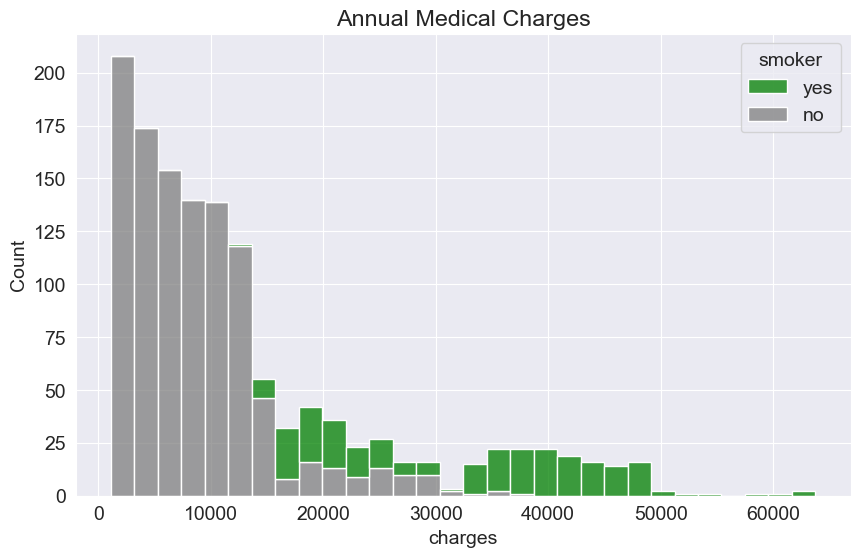

In [211]:
fig, ax = plt.subplots()
sns.histplot(data = medical_df,
             x = 'charges',
             hue = 'smoker',
             multiple = 'stack',
             palette = ['green','grey'],
             ax = ax)

ax.set_title('Annual Medical Charges')
plt.show()

In [212]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

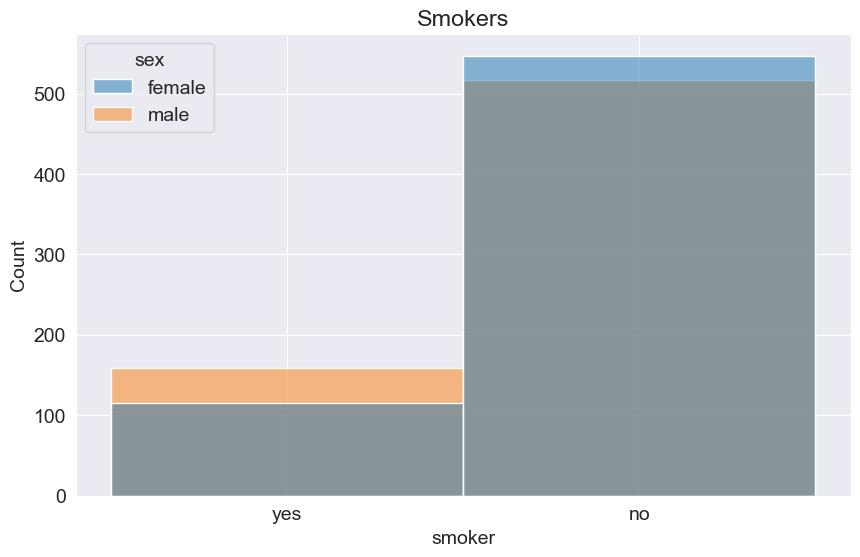

In [213]:
sns.histplot(data = medical_df,
             x = 'smoker',
             hue = 'sex',)

plt.title('Smokers')
plt.show()

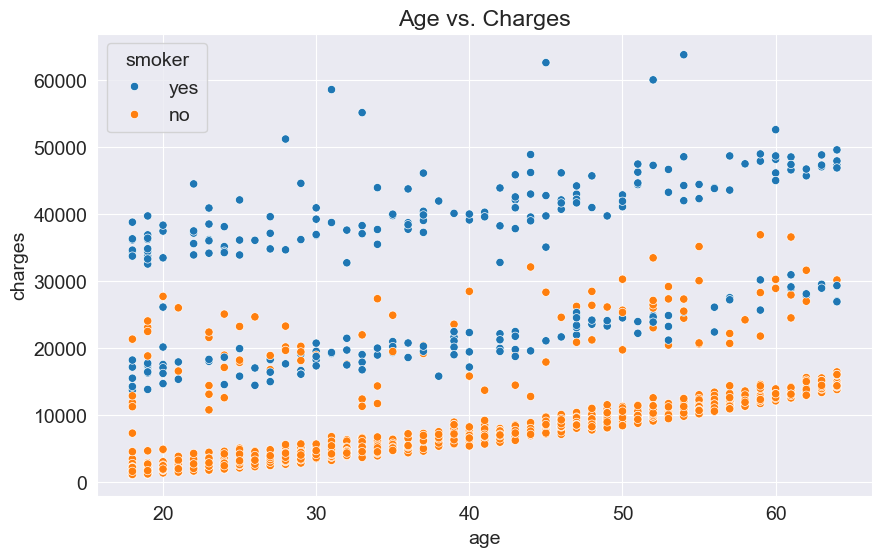

In [214]:
sns.scatterplot(data=medical_df,
                x = 'age',
                y = 'charges',
                hue = 'smoker')
plt.title('Age vs. Charges')
plt.show()